In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('transactions_n100000.csv')

In [3]:
df.head(20)

,ticket_id,order_timestamp,location,item_name,item_count,lat,long
0,0x7901ee,2019-01-16 18:33:00,7,shake,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,burger,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,fries,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salad,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,fries,1,41.884490,-87.627059
5,0x6d6979,2019-03-18 00:27:00,6,burger,2,41.784576,-87.607565
6,0x6d6979,2019-03-18 00:27:00,6,fries,2,41.784576,-87.607565
7,0x78dd1e,2019-09-22 00:10:00,2,shake,2,42.049306,-87.677606
8,0x78dd1e,2019-09-22 00:10:00,2,burger,2,42.049306,-87.677606
9,0x78dd1e,2019-09-22 00:10:00,2,fries,2,42.049306,-87.677606


In [4]:
df.dtypes

ticket_id           object
order_timestamp     object
location             int64
item_name           object
item_count           int64
lat                float64
long               float64
dtype: object

In [5]:
df.shape

(260645, 7)

In [6]:
df['item_name'].value_counts()

fries     100000
burger     76122
shake      46156
salad      38367
Name: item_name, dtype: int64

#### Possible data engineering:
1. Purchase time: breakfast, lunch, dinner, and somewhere in between
2. Location
3. Number of items purchased

Note:
At this point I personally think it is not reasonable to include month or date as a feature for clusting because clusting orders with month as a variable may not be interpreted as a behavior for customers within certain segment. (i.e. create a segment implying one group of customer like to place order in a particular month or date seems odd to me). 

In [7]:
df['ticket_id'].value_counts()

0x317c3e    4
0x2df52e    4
0x7cb5bb    4
0x2d639d    4
0x4c87c1    4
           ..
0x8e192c    2
0x1bf22f    2
0x3ce8ba    2
0x48db0e    2
0x7e5bcc    2
Name: ticket_id, Length: 100000, dtype: int64

In [31]:
# The dataset contains 100,000 purchase records
# Each records have various items been purchased

# Create a dataframe with each ticket id as a row
df_con = df[['ticket_id', 'location', 'order_timestamp']]

# Because the location and timestamp for each ticket will be the same, 
# other duplicates could be dropped
df_con.drop_duplicates(subset = 'ticket_id',inplace = True)
df_con.reset_index(drop = True, inplace = True)

C:\Users\ThinkPad\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [32]:
df_con

,ticket_id,location,order_timestamp
0,0x7901ee,7,2019-01-16 18:33:00
1,0x12b47f,3,2019-09-04 12:36:00
2,0x6d6979,6,2019-03-18 00:27:00
3,0x78dd1e,2,2019-09-22 00:10:00
4,0x4df8ab,8,2019-01-17 11:35:00
...,...,...,...
99995,0x804d8d,6,2019-01-08 00:28:00
99996,0x7b618c,9,2019-07-14 00:12:00
99997,0x75ab27,5,2019-04-03 11:31:00
99998,0x560060,6,2019-08-09 00:23:00


#### Purchase time 

In [33]:
# Convert datatype for 'order_timestamp' to datetime64 for further process
df_con['order_timestamp'] = pd.to_datetime(df_con['order_timestamp'])

C:\Users\ThinkPad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
df_con.dtypes

ticket_id                  object
location                    int64
order_timestamp    datetime64[ns]
dtype: object

In [35]:
# Check time period of this dataset
print ('The time period of this dataset are between ' + 
       str(df_con['order_timestamp'].min()) + ' and ' 
       + str(df_con['order_timestamp'].max()))


The time period of this dataset are between 2019-01-01 00:00:00 and 2019-12-30 23:59:00


In [36]:
# Get the hour of purchase for each order

df_con['order_hour'] = df_con['order_timestamp'].dt.hour

df_con.head()

C:\Users\ThinkPad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ticket_id,location,order_timestamp,order_hour
0,0x7901ee,7,2019-01-16 18:33:00,18
1,0x12b47f,3,2019-09-04 12:36:00,12
2,0x6d6979,6,2019-03-18 00:27:00,0
3,0x78dd1e,2,2019-09-22 00:10:00,0
4,0x4df8ab,8,2019-01-17 11:35:00,11


In [37]:
# Get the day of the week of purchase for each order
# May be used to create feature such as weekday or weekend 

df_con['day_of_week'] = df_con['order_timestamp'].dt.weekday

# Result is ranged from 0-6 instead of 1-7


C:\Users\ThinkPad\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [38]:
# Based on the day_of_week, create weekday_order feature 
# to distinguish whether the purchase happended on weekday or weekend
df_con['weekday_order'] = np.where(df_con['day_of_week'] >= 5, 0, 1)

C:\Users\ThinkPad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
df_con

,ticket_id,location,order_timestamp,order_hour,day_of_week,weekday_order
0,0x7901ee,7,2019-01-16 18:33:00,18,2,1
1,0x12b47f,3,2019-09-04 12:36:00,12,2,1
2,0x6d6979,6,2019-03-18 00:27:00,0,0,1
3,0x78dd1e,2,2019-09-22 00:10:00,0,6,0
4,0x4df8ab,8,2019-01-17 11:35:00,11,3,1
...,...,...,...,...,...,...
99995,0x804d8d,6,2019-01-08 00:28:00,0,1,1
99996,0x7b618c,9,2019-07-14 00:12:00,0,6,0
99997,0x75ab27,5,2019-04-03 11:31:00,11,2,1
99998,0x560060,6,2019-08-09 00:23:00,0,4,1


In [40]:
# Possible item to purchase

items = list(set(df['item_name']))

items

['salad', 'shake', 'burger', 'fries']

In [41]:
# Create columns for each item
for i in items:
    df_con[i] = 0

df_con.head()

C:\Users\ThinkPad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ticket_id,location,order_timestamp,order_hour,day_of_week,weekday_order,salad,shake,burger,fries
0,0x7901ee,7,2019-01-16 18:33:00,18,2,1,0,0,0,0
1,0x12b47f,3,2019-09-04 12:36:00,12,2,1,0,0,0,0
2,0x6d6979,6,2019-03-18 00:27:00,0,0,1,0,0,0,0
3,0x78dd1e,2,2019-09-22 00:10:00,0,6,0,0,0,0,0
4,0x4df8ab,8,2019-01-17 11:35:00,11,3,1,0,0,0,0


In [30]:
# Compute # of item purchased for each order

for index,row in df_con.iterrows():
    tid = row['ticket_id']
    
    # Lookup the transaction of this particular order
    df_t = df.loc[df['ticket_id'] == tid] 
    
    # Initiate count for each item
    p_count = {'salad':0, 'fries':0, 'burger':0, 'shake': 0}
    
    # Iterate transaction of the order to update the count dict
    
    for ix, r in df_t.iterrows():
        item = r['item_name']
        quant = r['item_count']
        
        p_count[item] += quant
    
    # Remap the result to the concatenate dataframe
    
    for c in p_count.items():
        df_con.at[index, c[0]] = c[1]
    

KeyboardInterrupt: 

This process takes a long time. It could be done faster using pd.merge if each item in every order only appear once at most. But I did not check whether this is the case.

## Please run the code from here after

In [3]:
df_con = pd.read_csv('ticket_info.csv')

Further thoughts:
1. Check the relationship bewteen fries, burger and salad
2. Count number of main. What's the portion of burger in main? How many customers would buy shake with a main?
3. Count number of types of items purchased per order (max at 4)?
4. Do the consumption patterns vary in different time?
4. Do clusting at different location? Or consider location as one variable
5. Percentage of each item (item count/total)
6. Order_hours process: scale or encoder
7. Create location categorical variable: 3 groups (1,3,5,8) (4,7,9) (2,6)
8. Drop day of week

In [44]:
check_array = df_con['burger'] + df_con['salad'] - df_con['fries']
check_array.abs().sum() 
# it turns out that for every single order, the number of fries equals to the sum of burgers and salads

0

In [45]:
df_con['main'] = df_con['burger'] + df_con['salad']
df_con['burger_ratio'] = df_con['burger'] / df_con['main']
df_con['shake_ratio'] = df_con['shake'] / df_con['main']
df_con.head()

,ticket_id,location,order_timestamp,order_hour,day_of_week,weekday_order,salad,fries,burger,shake,main,burger_ratio,shake_ratio
0,0x7901ee,7,2019-01-16 18:33:00,18,2,1,0,2,2,2,2,1.0,1.0
1,0x12b47f,3,2019-09-04 12:36:00,12,2,1,1,1,0,0,1,0.0,0.0
2,0x6d6979,6,2019-03-18 00:27:00,0,0,1,0,2,2,0,2,1.0,0.0
3,0x78dd1e,2,2019-09-22 00:10:00,0,6,0,0,2,2,2,2,1.0,1.0
4,0x4df8ab,8,2019-01-17 11:35:00,11,3,1,3,3,0,0,3,0.0,0.0


In [49]:
# create number of types of items
items = ['burger','fries','salad','shake']

def cal_type(array_like,type_list):
    return sum(array_like[type_list] != 0)

df_con['n_type'] = df_con.apply(lambda x: cal_type(x,items), axis = 1)
    

In [50]:
# drop day_of_week feature

df_con.drop(['day_of_week'], axis = 1, inplace = True)

In [51]:
# Create dummy variable for location
df_loc = pd.get_dummies(df_con['location'], prefix = 'location')

df_con = pd.concat([df_con, df_loc], axis = 1)

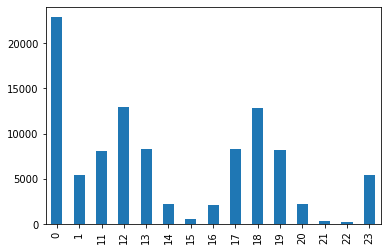

In [58]:
df_con['order_hour'].value_counts().sort_index().plot.bar()

In [60]:
df_con['lunch'] = np.where((df_con['order_hour'] >= 10) & (df_con['order_hour'] <= 15), 1, 0)
df_con['dinner'] = np.where((df_con['order_hour'] >= 16) & (df_con['order_hour'] <= 21), 1, 0)
df_con['supper'] = np.where((df_con['order_hour'] >= 22) | (df_con['order_hour'] <= 2), 1, 0)

In [93]:
# Export dataframe as csv file to save runtime

df_con.to_csv('ticket_info.csv', header = True, index = False)

df_con.head()

,ticket_id,location,order_timestamp,order_hour,weekday_order,salad,fries,burger,shake,main,burger_ratio,shake_ratio,n_type,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,lunch,dinner,supper
0,0x7901ee,7,2019-01-16 18:33:00,18,1,0,2,2,2,2,1.00000,1.00000,3,0,0,0,0,0,0,1,0,0,0,1,0
1,0x12b47f,3,2019-09-04 12:36:00,12,1,1,1,0,0,1,0.00000,0.00000,2,0,0,1,0,0,0,0,0,0,1,0,0
2,0x6d6979,6,2019-03-18 00:27:00,0,1,0,2,2,0,2,1.00000,0.00000,2,0,0,0,0,0,1,0,0,0,0,0,1
3,0x78dd1e,2,2019-09-22 00:10:00,0,0,0,2,2,2,2,1.00000,1.00000,3,0,1,0,0,0,0,0,0,0,0,0,1
4,0x4df8ab,8,2019-01-17 11:35:00,11,1,3,3,0,0,3,0.00000,0.00000,2,0,0,0,0,0,0,0,1,0,1,0,0


### Try clustering with KMeans

In [64]:
var = list(df_con.columns)

var

['ticket_id',
 'location',
 'order_timestamp',
 'order_hour',
 'weekday_order',
 'salad',
 'fries',
 'burger',
 'shake',
 'main',
 'burger_ratio',
 'shake_ratio',
 'n_type',
 'location_1',
 'location_2',
 'location_3',
 'location_4',
 'location_5',
 'location_6',
 'location_7',
 'location_8',
 'location_9',
 'lunch',
 'dinner',
 'supper']

In [65]:
# remove unused items from var

var_del = ['ticket_id', 'location', 'order_timestamp']

for i in var_del:
    var.remove(i)

var

['order_hour',
 'weekday_order',
 'salad',
 'fries',
 'burger',
 'shake',
 'main',
 'burger_ratio',
 'shake_ratio',
 'n_type',
 'location_1',
 'location_2',
 'location_3',
 'location_4',
 'location_5',
 'location_6',
 'location_7',
 'location_8',
 'location_9',
 'lunch',
 'dinner',
 'supper']

In [66]:
# Use scaler to standardize data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_con[var])

df_scaled = scaler.transform(df_con[var])

In [67]:
from sklearn.cluster import KMeans

def SSE(df, max_n):
    '''
    Return SSE with different number of clusters
    
    Inputs:
        df -> (pandas dataframe) Dataframe with all features
        max_n -> (int) maximum number of clusters to test
        
    Return:
        result -> (list) a list contain SSEs for different number of clusters, starts at 1
    
    '''
    
    result = []
    
    for i in range(1, max_n + 1):
        km = KMeans(n_clusters = i, n_jobs = -1)
        km.fit(df)
        result.append(km.inertia_)
    
    return result

In [68]:
# Compute SSE for different number of clusters up to 15

sse = SSE(df_scaled, 15)

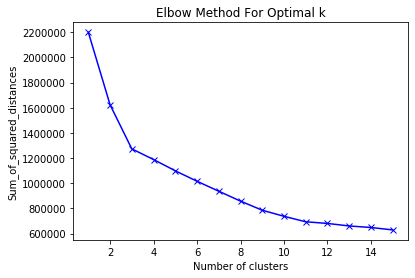

In [69]:
plt.plot(range(1 ,16), sse, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [70]:
# Try n_cluster = 3

km = KMeans(n_clusters = 3, random_state = 0, n_jobs = -1)
km.fit(df_scaled)

scaler.inverse_transform(km.cluster_centers_)

array([[1.23660917e+01, 7.15268726e-01, 1.92870351e+00, 2.25369062e+00,
        3.24987117e-01, 1.04731880e-01, 2.25369062e+00, 1.43902513e-01,
        4.64801398e-02, 2.34223529e+00, 1.99157295e-01, 3.74367213e-02,
        2.00582012e-01, 4.12258632e-02, 2.01218588e-01, 3.85886204e-02,
        4.22261966e-02, 1.99369487e-01, 4.01952166e-02, 9.61077935e-01,
        2.69786899e-02, 1.19433751e-02],
       [1.79610852e+01, 7.15634183e-01, 1.82997418e-01, 3.67291994e+00,
        3.48992253e+00, 3.27359079e+00, 3.67291994e+00, 9.51842837e-01,
        8.96385071e-01, 3.16711686e+00, 3.01582119e-02, 3.24438244e-02,
        3.17611090e-02, 2.65724717e-01, 3.19392086e-02, 3.31859064e-02,
        2.67149515e-01, 3.97162278e-02, 2.67921280e-01, 7.12398706e-03,
        9.80230936e-01, 1.26450770e-02],
       [3.76120881e+00, 7.11481904e-01, 4.03937339e-02, 1.76571034e+00,
        1.72531661e+00, 3.06704279e-01, 1.76571034e+00, 9.76338955e-01,
        1.75822280e-01, 2.30118240e+00, 2.93799892e-02

In [71]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Put result to a dataframe
df_result = pd.DataFrame(data = scaler.inverse_transform(km.cluster_centers_), columns = var)

In [72]:
df_result

,order_hour,weekday_order,salad,fries,burger,shake,main,burger_ratio,shake_ratio,n_type,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,lunch,dinner,supper
0,12.36609,0.71527,1.92870,2.25369,0.32499,0.10473,2.25369,0.14390,0.04648,2.34224,0.19916,0.03744,0.20058,0.04123,0.20122,0.03859,0.04223,0.19937,0.04020,0.96108,0.02698,0.01194
1,17.96109,0.71563,0.18300,3.67292,3.48992,3.27359,3.67292,0.95184,0.89639,3.16712,0.03016,0.03244,0.03176,0.26572,0.03194,0.03319,0.26715,0.03972,0.26792,0.00712,0.98023,0.01265
2,3.76121,0.71148,0.04039,1.76571,1.72532,0.30670,1.76571,0.97634,0.17582,2.30118,0.02938,0.40163,0.03094,0.02911,0.02071,0.39881,0.02875,0.03127,0.02941,0.00462,0.00357,0.99181


### Try different var

In [73]:
var2 = var.copy()

var2.remove('weekday_order')
var2.remove('n_type')

In [74]:
scaler = StandardScaler()

scaler.fit(df_con[var2])

df_scaled = scaler.transform(df_con[var2])

In [75]:
km2 = KMeans(n_clusters = 3, random_state = 0, n_jobs = -1)
km2.fit(df_scaled)

df_result2 = pd.DataFrame(data = scaler.inverse_transform(km2.cluster_centers_), columns = var2)

In [76]:
df_result2

,order_hour,salad,fries,burger,shake,main,burger_ratio,shake_ratio,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,lunch,dinner,supper
0,12.38802,1.92584,2.25501,0.32917,0.10857,2.25501,0.14545,0.04794,0.19896,0.03743,0.20044,0.04141,0.20101,0.03845,0.04241,0.19935,0.04053,0.95774,0.03039,0.01186
1,18.00330,0.17761,3.68081,3.50321,3.29423,3.68081,0.95406,0.90016,0.02946,0.03063,0.03129,0.26792,0.03159,0.03123,0.26912,0.03911,0.26966,0.00633,0.98452,0.00915
2,3.80951,0.04202,1.77444,1.73242,0.31432,1.77444,0.97590,0.17872,0.02956,0.40113,0.03084,0.02917,0.02061,0.39860,0.02905,0.03126,0.02979,0.00465,0.00605,0.98929


### Set location group

In [77]:
df1 = df_con[list(df_con.columns)[:-9]]

In [78]:
df1

,ticket_id,location,order_timestamp,order_hour,weekday_order,salad,fries,burger,shake,main,burger_ratio,shake_ratio,n_type,location_1,location_2,location_3
0,0x7901ee,7,2019-01-16 18:33:00,18,1,0,2,2,2,2,1.00000,1.00000,3,0,0,0
1,0x12b47f,3,2019-09-04 12:36:00,12,1,1,1,0,0,1,0.00000,0.00000,2,0,0,1
2,0x6d6979,6,2019-03-18 00:27:00,0,1,0,2,2,0,2,1.00000,0.00000,2,0,0,0
3,0x78dd1e,2,2019-09-22 00:10:00,0,0,0,2,2,2,2,1.00000,1.00000,3,0,1,0
4,0x4df8ab,8,2019-01-17 11:35:00,11,1,3,3,0,0,3,0.00000,0.00000,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x804d8d,6,2019-01-08 00:28:00,0,1,0,5,5,1,5,1.00000,0.20000,3,0,0,0
99996,0x7b618c,9,2019-07-14 00:12:00,0,0,0,4,4,2,4,1.00000,0.50000,3,0,0,0
99997,0x75ab27,5,2019-04-03 11:31:00,11,1,1,1,0,0,1,0.00000,0.00000,2,0,0,0
99998,0x560060,6,2019-08-09 00:23:00,0,1,0,2,2,0,2,1.00000,0.00000,2,0,0,0


In [79]:
# Define 3 location groups
group_1 = [1,3,5,8]
group_2 = [2,6]
group_3 = [4,7,9]


# Create empty columns
for i in range(1,4):
    df1['loc_group_{}'.format(i)] = 0
    

for index,row in df1.iterrows():
    loc = int(row['location'])
    
    if loc in group_1:
        df1.at[index, 'loc_group_1'] = 1
    elif loc in group_2:
        df1.at[index, 'loc_group_2'] = 1
    else:
        df1.at[index, 'loc_group_3'] = 1
    

C:\Users\ThinkPad\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [81]:
var3 = list(df1.columns)

var_del = ['ticket_id', 'location', 'order_timestamp', 'weekday_order', 'n_type']

for i in var_del:
    var3.remove(i)

var3

['order_hour',
 'salad',
 'fries',
 'burger',
 'shake',
 'main',
 'burger_ratio',
 'shake_ratio',
 'location_1',
 'location_2',
 'location_3',
 'loc_group_1',
 'loc_group_2',
 'loc_group_3']

In [82]:
scaler = StandardScaler()

scaler.fit(df1[var3])

df_scaled = scaler.transform(df1[var3])

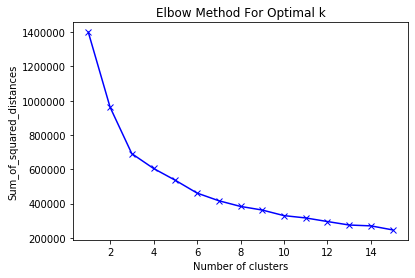

In [83]:
sse = SSE(df_scaled, 15)

plt.plot(range(1 ,16), sse, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [84]:
km3 = KMeans(n_clusters = 3, random_state = 0, n_jobs = -1)
km3.fit(df_scaled)

df_result3 = pd.DataFrame(data = scaler.inverse_transform(km3.cluster_centers_), columns = var3)

In [85]:
df_result3

,order_hour,salad,fries,burger,shake,main,burger_ratio,shake_ratio,location_1,location_2,location_3,loc_group_1,loc_group_2,loc_group_3
0,17.70394,0.16985,3.71945,3.54960,3.26842,3.71945,0.95655,0.88521,0.02507,0.02124,0.02654,0.12016,0.05637,0.82347
1,4.20836,0.11947,1.74380,1.62433,0.31290,1.74380,0.93568,0.17843,0.00000,0.45819,0.00000,0.03947,0.88250,0.07803
2,12.03424,1.80542,2.22982,0.42439,0.13670,2.22982,0.20518,0.06555,0.22656,0.00322,0.22961,0.86042,0.02422,0.11536


### Only retain these numerical attris when running clustering

In [94]:
var5 = [ 'main', 'n_type','burger_ratio', 'shake_ratio']

scaler = StandardScaler()

scaler.fit(df_con[var5])

df_scaled = scaler.transform(df_con[var5])


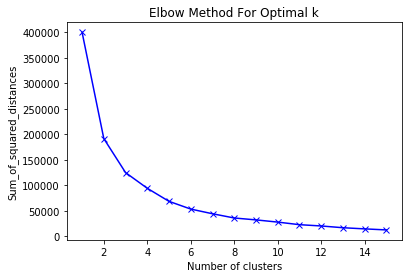

In [95]:
sse = SSE(df_scaled, 15)
plt.plot(range(1 ,16), sse, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [99]:
km4 = KMeans(n_clusters = 4, n_jobs = -1)
km4.fit(df_scaled)

df_scaled_ = df_con.copy()

df_scaled_['group'] = np.array(km4.labels_)
df_result4 = df_scaled_.groupby(by='group').mean()
df_result4

,location,order_hour,weekday_order,salad,fries,burger,shake,main,burger_ratio,shake_ratio,n_type,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,lunch,dinner,supper
group,,,,,,,,,,,,,,,,,,,,,,,
0,5.35943,12.14346,0.71491,0.06113,2.08407,2.02294,1.71307,2.08407,0.96943,0.83397,3.06113,0.04081,0.17152,0.04265,0.16179,0.03784,0.17459,0.16307,0.04731,0.16041,0.07542,0.54170,0.38288
1,4.27374,4.29835,0.71126,0.00000,1.56372,1.56372,0.00000,1.56372,1.00000,0.00000,2.00000,0.03658,0.38453,0.04044,0.03004,0.02871,0.37852,0.02921,0.04023,0.03174,0.04661,0.00481,0.94858
2,5.90351,16.30308,0.71605,0.46459,4.23124,3.76665,3.30392,4.23124,0.88256,0.77767,3.27252,0.04735,0.06089,0.04658,0.22634,0.04695,0.06115,0.22689,0.05520,0.22864,0.09780,0.82075,0.08145
3,4.52420,12.12377,0.71418,1.97702,2.16209,0.18507,0.00000,2.16209,0.07264,0.00000,2.17494,0.19308,0.04879,0.19464,0.04136,0.19647,0.05041,0.04305,0.19177,0.04043,0.92678,0.02951,0.04371


In [100]:
df_result4.to_csv('best_result.csv')